In [191]:
import pandas as pd
import matplotlib.pyplot as plt


import regex as re

In [192]:
#Files to load
reviews_df= pd.read_csv(r"C:\Users\polska2207\Downloads\reviews2.csv")
reviews_df


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3686,131293,2010-11-01,257234,Callie,Staying with Levita and her wonderful family w...
1,67483,178804,2011-02-06,74805,Nathan,We had a wonderful stay! It's a beautiful hous...
2,67483,186099,2011-02-21,41558,Rajeev,Looks like my last review didn't get posted. \...
3,67483,215731,2011-04-03,368549,Sarah-Marie,I visited DC with my boyfriend from Germany. C...
4,67483,255742,2011-05-08,530299,Marci,The upstairs apartment was charming and comfor...
...,...,...,...,...,...,...
382003,1011662043769361021,1038476115922639203,2023-12-03,404046632,Juhi,"This was a wonderful place, honestly a steal, ..."
382004,1011662043769361021,1048665126771903495,2023-12-17,294302840,Cheryl,Scott's place was PERFECT for our group of 6. ...
382005,1011936731526425450,1026126491905061548,2023-11-16,139333439,Cong,I had a nice stay. highly recommended!
382006,1012429822724520886,1027662447106785746,2023-11-18,395784221,Amanda,Kyle’s place was just in the right spot for wa...


In [193]:
# Read in Reviews dataset
reviews2 = pd.read_csv('/Users/polska2207/Downloads/reviews2.csv')

In [194]:
# Summary Stats
# Check shape for total number of reviews
reviews2.shape

(382008, 6)

In [195]:
# Look at reviews data
reviews2.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3686,131293,2010-11-01,257234,Callie,Staying with Levita and her wonderful family w...
1,67483,178804,2011-02-06,74805,Nathan,We had a wonderful stay! It's a beautiful hous...
2,67483,186099,2011-02-21,41558,Rajeev,Looks like my last review didn't get posted. \...
3,67483,215731,2011-04-03,368549,Sarah-Marie,I visited DC with my boyfriend from Germany. C...
4,67483,255742,2011-05-08,530299,Marci,The upstairs apartment was charming and comfor...


In [196]:
# Look at info stats
reviews2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382008 entries, 0 to 382007
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     382008 non-null  int64 
 1   id             382008 non-null  int64 
 2   date           382008 non-null  object
 3   reviewer_id    382008 non-null  int64 
 4   reviewer_name  382007 non-null  object
 5   comments       381905 non-null  object
dtypes: int64(3), object(3)
memory usage: 17.5+ MB


In [197]:
reviews2.dtypes

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

In [198]:
# Check for null values
reviews2.isnull().sum()

listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      1
comments         103
dtype: int64

In [199]:
# look at reviews that are null
reviews2[reviews2['comments'].isnull()]
# appears these are for reviews left that have no content in them (or maybe were images or videos that could not be 
# read in properly)

,listing_id,id,date,reviewer_id,reviewer_name,comments
14355,1280092,523423704,2019-09-03,282934264,Mort,NaN
32916,4204367,405137738,2019-01-26,229134147,Clare,NaN
34540,4231934,709349150492130848,2022-09-05,169375026,Stephanie,NaN
46725,6717232,755095144634790339,2022-11-07,29922430,Rob,NaN
49411,7714880,657416910,2020-08-28,355574662,Brianna,NaN
...,...,...,...,...,...,...
371914,791264080712134738,937755310959753417,2023-07-17,248053965,Tiffany,NaN
372344,831021525157388935,984808339849399262,2023-09-20,343062683,Adriana,NaN
373561,834189964070397979,855842288088606322,2023-03-26,271271017,Dan,NaN
373829,851372053298535940,1018214617621038031,2023-11-05,452683687,Alex,NaN


In [200]:
# might be value in the missing reviews (when comparing to listing_id) so will fill with 'missing'
reviews2['comments'].fillna('missing', inplace=True)

In [201]:
# all reviews in this dataset have a listing id tied to them
reviews2['id'].groupby(by=reviews2['listing_id']).sum().sort_values()

listing_id
992247988704939487   -9220797083207812746
53471128             -9209571609841868806
773986570397336334   -9206651417031161988
11299890             -9206306852254234409
17303429             -9200437331014971640
                             ...         
2111965               9200164950497025644
842857318178837612    9200745504520215310
22062712              9203018328890177199
35281469              9204434994274303683
41838130              9221308560254334680
Name: id, Length: 5365, dtype: int64

In [202]:
# there are 5365 unique listing ids in the reviews dataset
reviews2['listing_id'].nunique()

5365

In [203]:
# read in listings dataset for comparison
listings = pd.read_csv('/Users/polska2207/Downloads/reviews2.csv')

In [204]:
# read in listings dataset for comparison
listings = pd.read_csv('/Users/polska2207/Downloads/reviews2.csv')

In [205]:
listings['id'].nunique()
# Some listings do not have reviews
# All reviews in the reviews dataset have reviews listed, however some of the listings in the listings dataset are not
# in the reviews dataset. 

382008

In [206]:
382008 - 5365
# 376643 listings without reviews

376643

In [207]:
376643 / 382008
# percentage of listings without reviews

0.9859557915017486

In [208]:
# Looking at how many reviews are listed for a single date
reviews2[reviews2['date'] == '2023-12-01']

,listing_id,id,date,reviewer_id,reviewer_name,comments
16665,2111965,1037000425383388627,2023-12-01,397378673,Cyrus,It’s a bedroom in a 2 story house. Every room ...
19228,1488282,1037023293136765609,2023-12-01,428667460,Angela,We had a great stay here while visiting DC. It...
33826,4343926,1037020230953985700,2023-12-01,466101622,Zifeng,Hosts are nice. A quite place in the evening
37438,2538828,1037092537418888618,2023-12-01,44090788,Steve,Wonderful neighborhood. Spacious basement/gard...
48783,7714870,1037007421396568971,2023-12-01,68751545,Katherine,Cute lil room. Thermostat took a while to hea...
...,...,...,...,...,...,...
381764,1005799808157085162,1037065432961561610,2023-12-01,97387152,Yesenia,"Spacious, well designed, modern, and highly co..."
381807,1007405045646422516,1037035321243280950,2023-12-01,214126,A.J.,"It's a really beautiful & comfortable space, c..."
381827,1026106252087215196,1037025738198960205,2023-12-01,32875299,Harri,"Great host, I am a happy returning guest."
381832,1026728933602195009,1037008831898012578,2023-12-01,113866030,Tanya,I can't say enough great things about our stay...


In [209]:
# looking at count of reviews for each date
rev_by_date = reviews2.groupby('date')['comments'].count()

rev_by_date.sort_values()

date
2009-05-10      1
2011-09-10      1
2011-09-06      1
2013-01-31      1
2011-09-04      1
             ... 
2023-05-01    550
2023-04-16    572
2023-04-23    578
2023-11-05    593
2023-10-22    627
Name: comments, Length: 4611, dtype: int64

In [210]:
rev_by_date.dtypes

dtype('int64')

In [211]:
# Create a dataframe of the review counts by date
rev_by_date = pd.DataFrame(rev_by_date)
rev_by_date

,comments
date,
2009-05-10,1
2009-05-14,1
2009-05-21,1
2009-05-28,1
2009-06-04,1
...,...
2023-12-13,71
2023-12-14,58
2023-12-15,65


In [212]:
rev_by_date.dtypes

comments    int64
dtype: object

In [213]:
rev_by_date.index =  pd.to_datetime(rev_by_date.index, format='%Y-%m-%d')
rev_by_date.sort_index()

,comments
date,
2009-05-10,1
2009-05-14,1
2009-05-21,1
2009-05-28,1
2009-06-04,1
...,...
2023-12-13,71
2023-12-14,58
2023-12-15,65


In [214]:
rev_by_date["Year"] = rev_by_date.index
rev_by_date["Year"] = rev_by_date["Year"].dt.year
rev_by_date

,comments,Year
date,,
2009-05-10,1,2009
2009-05-14,1,2009
2009-05-21,1,2009
2009-05-28,1,2009
2009-06-04,1,2009
...,...,...
2023-12-13,71,2023
2023-12-14,58,2023
2023-12-15,65,2023


In [215]:
df_avg = rev_by_date.groupby("Year")["comments"].mean()
df_avg

Year
2009      1.062500
2010      1.322314
2011      1.678899
2012      2.496552
2013      4.014793
2014      8.063712
2015     18.211111
2016     38.407104
2017     71.865753
2018    104.247253
2019    142.821918
2020     67.215847
2021    130.649315
2022    210.071233
2023    258.088319
Name: comments, dtype: float64

In [216]:
# convert to dataframe
avg_daily_revs_avg = pd.DataFrame(df_avg)
avg_daily_revs_avg

,comments
Year,
2009,1.062500
2010,1.322314
2011,1.678899
2012,2.496552
2013,4.014793
2014,8.063712
2015,18.211111
2016,38.407104
2017,71.865753


In [217]:
# which date had the most reviews
rev_by_date['comments'].sort_values()

date
2009-05-10      1
2011-09-10      1
2011-09-06      1
2013-01-31      1
2011-09-04      1
             ... 
2023-05-01    550
2023-04-16    572
2023-04-23    578
2023-11-05    593
2023-10-22    627
Name: comments, Length: 4611, dtype: int64

In [218]:
# Look at number of reviews per date
reviews2['date'].value_counts()


2023-10-22    627
2023-11-05    593
2023-04-23    578
2023-04-16    572
2023-05-01    550
             ... 
2010-10-01      1
2010-10-13      1
2013-02-16      1
2013-01-26      1
2012-12-20      1
Name: date, Length: 4611, dtype: int64

In [219]:
# Does increase in reviews equate to increase in listings?
# read in calendar datasets to get listing counts (2023)
calendar_2023 = pd.read_csv('/Users/polska2207/Downloads/calendar.csv')
calendar_2023['listing_id'].nunique()

9189

In [220]:
# read in calendar datasets to get listing counts 2023
calendar = pd.read_csv('/Users/polska2207/Downloads/calendar.csv')
calendar['listing_id'].nunique()

9189

In [221]:
# read in calendar datasets to get listing counts 2023
calendar_23 = pd.read_csv('/Users/polska2207/Downloads/calendar.csv')
calendar_23['listing_id'].nunique

<bound method IndexOpsMixin.nunique of 0              3344
1              3344
2              3344
3              3344
4              3344
             ...   
3354065    38478357
3354066    38478357
3354067    38478357
3354068    38478357
3354069    38478357
Name: listing_id, Length: 3354070, dtype: int64>

In [222]:
# create a dataframe of the listings count data
cal_data = {'year': [2020, 2021, 2022, 2023],
           'num_listings': [3723, 7868, 9182, 9189]}
cal_df = pd.DataFrame(cal_data, columns=['year', 'num_listings'])
cal_df

,year,num_listings
0,2020,3723
1,2021,7868
2,2022,9182
3,2023,9189


In [223]:
# set the year as the index
cal_df.set_index('year', inplace=True)

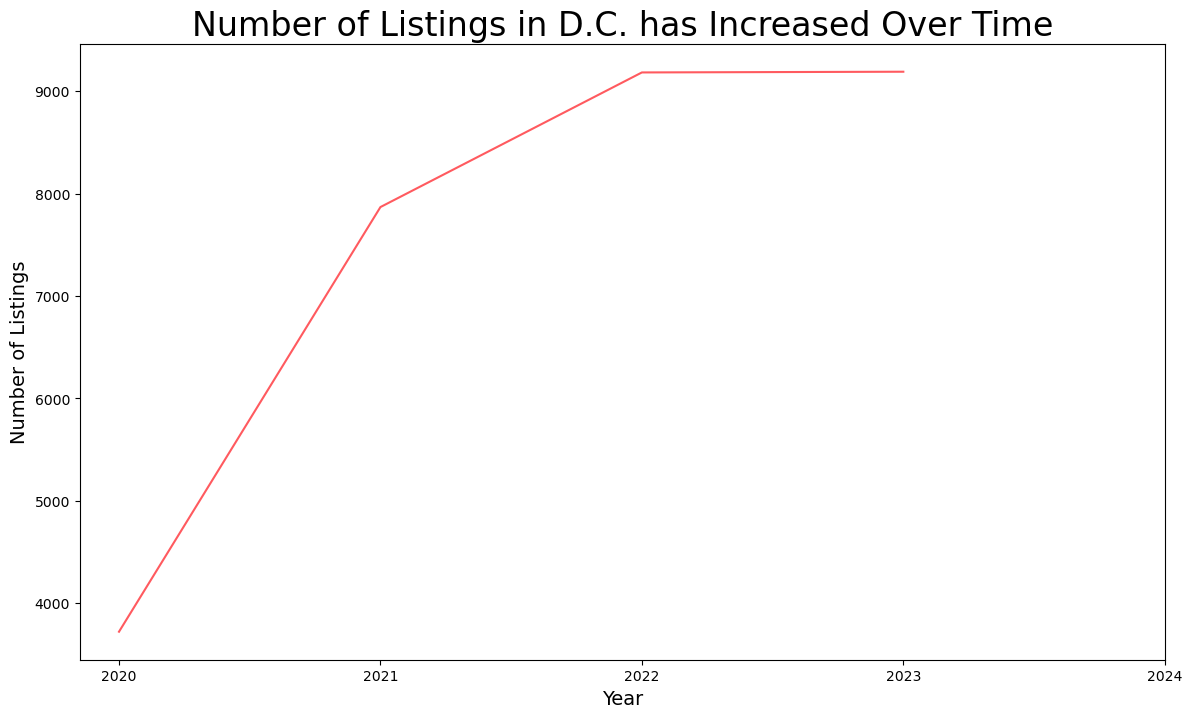

In [224]:
# plot the listings count over time
plt.figure(figsize=(14, 8))

plt.plot(cal_df, color='#FF5A5F')

plt.xticks(ticks=[2020, 2021, 2022, 2023, 2024])

plt.xlabel('Year', fontdict={'fontsize': 14})
plt.ylabel('Number of Listings', fontdict={'fontsize': 14})
plt.title('Number of Listings in D.C. has Increased Over Time', fontdict={'fontsize': 24});

In [225]:
# Transfor Review Text
# define function to clean review text
def clean_text(df, text):
    df[text] = df[text].str.replace("won\'t", "will not")
    df[text] = df[text].str.replace("can\'t", "can not")
    df[text] = df[text].str.replace("n\'t", " not")
    df[text] = df[text].str.replace("\'re", " are")
    df[text] = df[text].str.replace("\'s", " is")
    df[text] = df[text].str.replace("\'d", " would")
    df[text] = df[text].str.replace("\'ll", " will")
    df[text] = df[text].str.replace("\'t", " not")
    df[text] = df[text].str.replace("\'ve", " have")
    df[text] = df[text].str.replace("\'m", " am")
    df[text] = df[text].str.replace('\r', '')
    df[text] = df[text].str.replace('\n', '')
    df[text] = df[text].str.replace(',', '')
    df[text] = df[text].str.replace('!', ' ')
    df[text] = df[text].str.replace('.', ' ')
    df[text] = df[text].str.replace('\'', '')
    df[text] = df[text].str.replace(';', '')
    df[text] = df[text].str.replace('-', '')
    df[text] = df[text].str.replace('(', '')
    df[text] = df[text].str.replace(')', '')
    df[text] = df[text].str.replace('--', '')
    df[text] = df[text].str.replace('---', '')
    df[text] = df[text].str.replace('?', ' ')
    df[text] = df[text].str.lower()
    return df

In [226]:
# check review
reviews2['comments'][0]

"Staying with Levita and her wonderful family was an amazing experience. They were so welcoming to me and her home was great. I cannot express enough how nice my experience was. Not only is Levita's home very close to the metro, extremely comfortable, but her vegan cooking was incredible as well. Anyone would be lucky to stay with such a friendly, welcoming family."

In [227]:
# apply clean_text function
clean_text(reviews2, 'comments')

C:\Users\polska2207\AppData\Local\Temp\ipykernel_2840\3507607243.py:18: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[text] = df[text].str.replace('.', ' ')
C:\Users\polska2207\AppData\Local\Temp\ipykernel_2840\3507607243.py:22: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[text] = df[text].str.replace('(', '')
C:\Users\polska2207\AppData\Local\Temp\ipykernel_2840\3507607243.py:23: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[text] = df[text].str.replace(')', '')
C:\Users\polska2207\AppData\Local\Temp\ipykernel

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3686,131293,2010-11-01,257234,Callie,staying with levita and her wonderful family w...
1,67483,178804,2011-02-06,74805,Nathan,we had a wonderful stay it is a beautiful hou...
2,67483,186099,2011-02-21,41558,Rajeev,looks like my last review did not get posted ...
3,67483,215731,2011-04-03,368549,Sarah-Marie,i visited dc with my boyfriend from germany c...
4,67483,255742,2011-05-08,530299,Marci,the upstairs apartment was charming and comfor...
...,...,...,...,...,...,...
382003,1011662043769361021,1038476115922639203,2023-12-03,404046632,Juhi,this was a wonderful place honestly a steal an...
382004,1011662043769361021,1048665126771903495,2023-12-17,294302840,Cheryl,scott is place was perfect for our group of 6 ...
382005,1011936731526425450,1026126491905061548,2023-11-16,139333439,Cong,i had a nice stay highly recommended
382006,1012429822724520886,1027662447106785746,2023-11-18,395784221,Amanda,kyle’s place was just in the right spot for wa...


In [228]:
# create a dataframe of the listings count data
cal_data = {'year': [2020, 2021, 2022, 2023],
           'num_listings': [3723, 7868, 9182, 9189]}
cal_df = pd.DataFrame(cal_data, columns=['year', 'num_listings'])
cal_df

,year,num_listings
0,2020,3723
1,2021,7868
2,2022,9182
3,2023,9189


In [229]:
reviews2.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3686,131293,2010-11-01,257234,Callie,staying with levita and her wonderful family w...
1,67483,178804,2011-02-06,74805,Nathan,we had a wonderful stay it is a beautiful hou...


In [295]:
# looking at count of reviews for each date
rev_by_date = reviews2.groupby('date')['comments'].count()

rev_by_date.sort_values()

date
2009-05-10      1
2011-09-10      1
2011-09-06      1
2013-01-31      1
2011-09-04      1
             ... 
2023-05-01    550
2023-04-16    572
2023-04-23    578
2023-11-05    593
2023-10-22    627
Name: comments, Length: 4611, dtype: int64

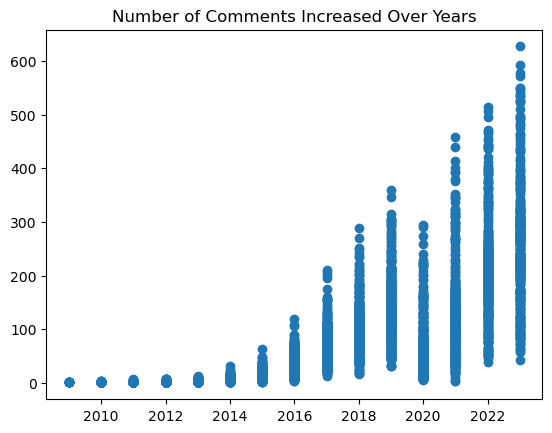

In [330]:
# Create plot
#Number of comments has increased over time 

plt.scatter(x=rev_by_date['year'], y=rev_by_date['comments'])
plt.title("Number of Comments Increased Over Years")
plt.show()